<a href="https://colab.research.google.com/github/maverick98/Coursera/blob/master/optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with SGD optimizer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Momentum optimizer...
Training with Nesterov optimizer...
Training with AdaGrad optimizer...
Training with RMSProp optimizer...
Training with Adam optimizer...


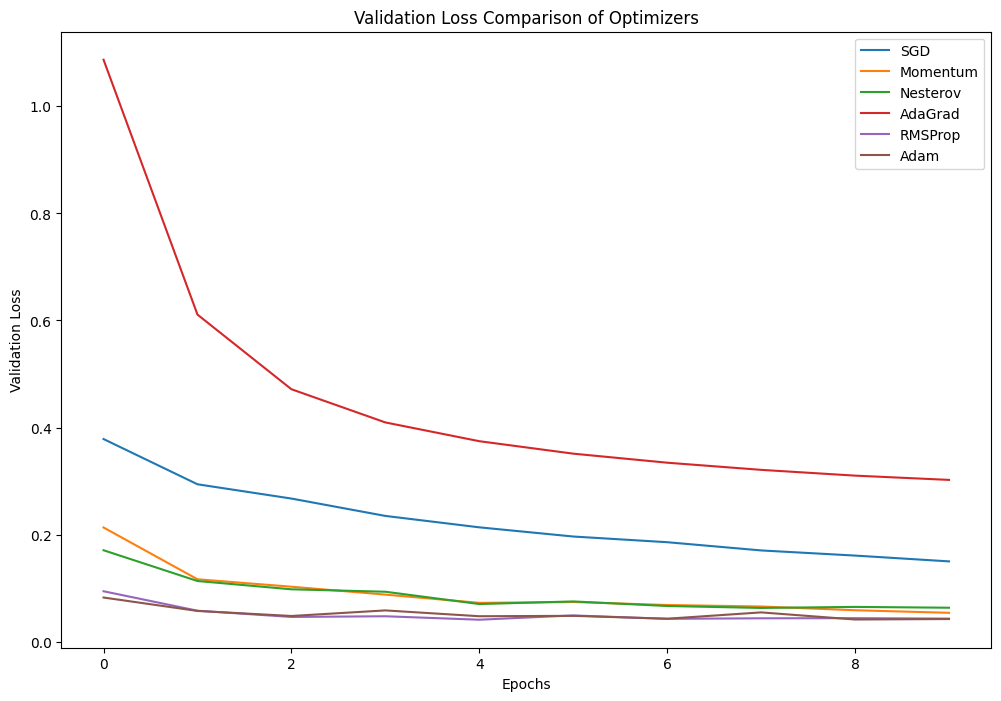

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Define a function to create the model
def create_model(optimizer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# List of optimizers to compare
optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "Nesterov": tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "AdaGrad": tf.keras.optimizers.Adagrad(),
    "RMSProp": tf.keras.optimizers.RMSprop(),
    "Adam": tf.keras.optimizers.Adam()
}

# Train and evaluate each optimizer
history = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model(optimizer)
    history[name] = model.fit(x_train, y_train, epochs=10, batch_size=128,
                              validation_data=(x_test, y_test), verbose=0)

# Plot training and validation loss for each optimizer
plt.figure(figsize=(12, 8))
for name, hist in history.items():
    plt.plot(hist.history['val_loss'], label=name)

plt.title('Validation Loss Comparison of Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
